**Task One**

We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the month of August 2018.

There are two datasets: 
- The first includes five columns:date, center_point_geom, longitude, latitude, number_of_strikes
- The second dataset contains seven columns:date, zip_code, city, state, state_code, center_point_geom, number_of_strikes

- The first dataset has two unique colums: longitude and latitude.
- The second dataset has four unique columns: zip_code, city, state, and state_code.
- There are three columns that are common between them: date, center_point_geom, and number_of_strikes.

**First**
 We want to combine the two datasets into a single dataframe that has all of the information from both datasets.
Ideally, both datasets will have the same number of entries for the same locations on the same dates. 
If they don't, we'll investigate which data is missing.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
# Read in first dataset
df1 = pd.read_csv('C:/Users/0&1/OneDrive/Documents/eda_dataset1.csv')

In [3]:
# Print the first 5 rows of dataset 1
df1.head()

date  center_point_geom  longitude  latitude  number_of_strikes
0  8/1/2018  POINT(-81.6 22.6)      -81.6      22.6                 48
1  8/1/2018  POINT(-81.1 22.6)      -81.1      22.6                 32
2  8/1/2018  POINT(-80.9 22.6)      -80.9      22.6                118
3  8/1/2018  POINT(-80.8 22.6)      -80.8      22.6                 69
4  8/1/2018  POINT(-98.4 22.8)      -98.4      22.8                 44

In [4]:
df1.shape

(717530, 5)

In [5]:
# Read in second dataset
df2 = pd.read_csv('c:/Users/0&1/OneDrive/Documents/eda_dataset2.csv')

In [6]:
# Print the first 5 rows of dataset 2
df2.head()

date  zip_code                                 city          state  \
0   8/8/2018      3281                                Weare  New Hampshire   
1  8/14/2018      6488                 Heritage Village CDP    Connecticut   
2  8/16/2018     97759  Sisters city, Black Butte Ranch CDP         Oregon   
3  8/18/2018      6776                      New Milford CDP    Connecticut   
4   8/8/2018      1077                            Southwick  Massachusetts   

  state_code   center_point_geom  number_of_strikes  
0         NH   POINT(-71.7 43.1)                  1  
1         CT   POINT(-73.2 41.5)                  3  
2         OR  POINT(-121.4 44.3)                  3  
3         CT   POINT(-73.4 41.6)                 48  
4         MA     POINT(-72.8 42)                  2

In [7]:
df2.shape

(323700, 7)

#### The second dataset has less than half the number of rows as the first one.

#### The first thing we'll do to explore this discrepancy:

Is to join the two datasets into a single dataframe. We can do this using the merge() method of the DataFrame class.

In [8]:
# Left-join the two datasets
df_joined = df1.merge(df2, how='left', on=['date', 'center_point_geom'])

In [9]:
# Print the first 5 rows of the merged data
df_joined.head()

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0  8/1/2018  POINT(-81.6 22.6)      -81.6      22.6                   48   
1  8/1/2018  POINT(-81.1 22.6)      -81.1      22.6                   32   
2  8/1/2018  POINT(-80.9 22.6)      -80.9      22.6                  118   
3  8/1/2018  POINT(-80.8 22.6)      -80.8      22.6                   69   
4  8/1/2018  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  
0       NaN  NaN   NaN        NaN                  NaN  
1       NaN  NaN   NaN        NaN                  NaN  
2       NaN  NaN   NaN        NaN                  NaN  
3       NaN  NaN   NaN        NaN                  NaN  
4       NaN  NaN   NaN        NaN                  NaN

#### About the new dataset:
The new dataframe has all of the columns of both original dataframes, and it has two number_of_strikes columns that are suffixed with _x and _y. This is because the key columns from both dataframes were the same, so they appear once in the merged dataframe.

## Finding missing data
- let's check how many missing state locations we have by using isnull() to create a Boolean mask that we'll apply to df_joined.
- The mask is a pandas Series object that contains True for every row with a missing state_code value and False for every row that is not missing data
in this column. When the mask is applied to df_joined, it filters out the rows that are not missing state_code data.
- Using the state_code column to create this mask is an arbitrary decision. We could have selected zip_code, city, or state instead and gotten the same results.


### We create the dataset of missing data to evaluate its nature

In [10]:
# Create a new df of just the rows that are missing data
df_null_geo = df_joined[pd.isnull(df_joined.state_code)]
df_null_geo.shape

(393830, 10)

In [11]:
# Print the first 5 rows
df_null_geo.head()

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0  8/1/2018  POINT(-81.6 22.6)      -81.6      22.6                   48   
1  8/1/2018  POINT(-81.1 22.6)      -81.1      22.6                   32   
2  8/1/2018  POINT(-80.9 22.6)      -80.9      22.6                  118   
3  8/1/2018  POINT(-80.8 22.6)      -80.8      22.6                   69   
4  8/1/2018  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  
0       NaN  NaN   NaN        NaN                  NaN  
1       NaN  NaN   NaN        NaN                  NaN  
2       NaN  NaN   NaN        NaN                  NaN  
3       NaN  NaN   NaN        NaN                  NaN  
4       NaN  NaN   NaN        NaN                  NaN

### So,
Now that we've merged all of our data together and isolated the rows with missing data, we can better understand what data is missing by plotting the longitude and latitude of locations that are missing city, state, and zip code data.

In [12]:
# Create new df of just latitude, longitude, and number of strikes and group by latitude and longitude
top_missing = df_null_geo[['latitude','longitude','number_of_strikes_x']
            ].groupby(['latitude','longitude'] 
                     ).sum().sort_values('number_of_strikes_x', ascending=False).reset_index()
top_missing.head(10)

latitude  longitude  number_of_strikes_x
0      22.4      -84.2                 3841
1      22.9      -82.9                 3184
2      22.4      -84.3                 2999
3      22.9      -83.0                 2754
4      22.5      -84.1                 2746
5      22.5      -84.2                 2738
6      22.3      -81.0                 2680
7      22.9      -82.4                 2652
8      22.9      -82.3                 2618
9      22.3      -84.3                 2551

#### Then, we import plotly to reduce the size of the data frame as we create a geographic scatter plot.

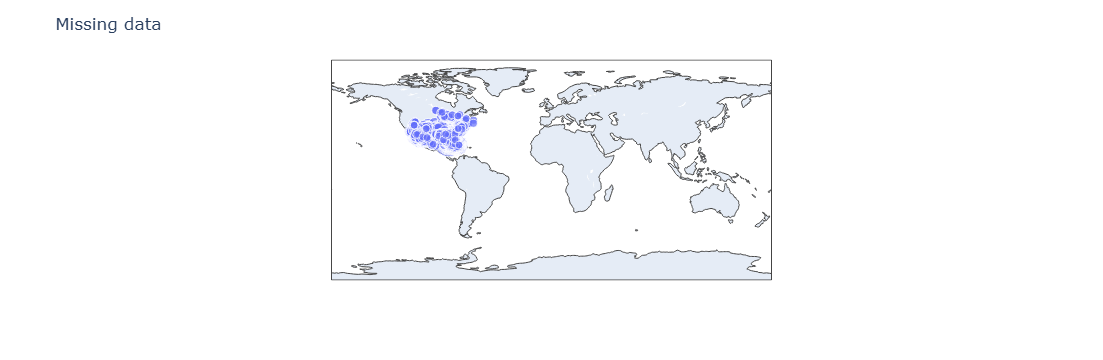

In [13]:
import plotly.express as px
# reduce size of db otherwise it could break
fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                    size="number_of_strikes_x") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Missing data', # Create a Title
)

fig.show()

#### We scale it down to only the geographic area we are interested in - the United States.

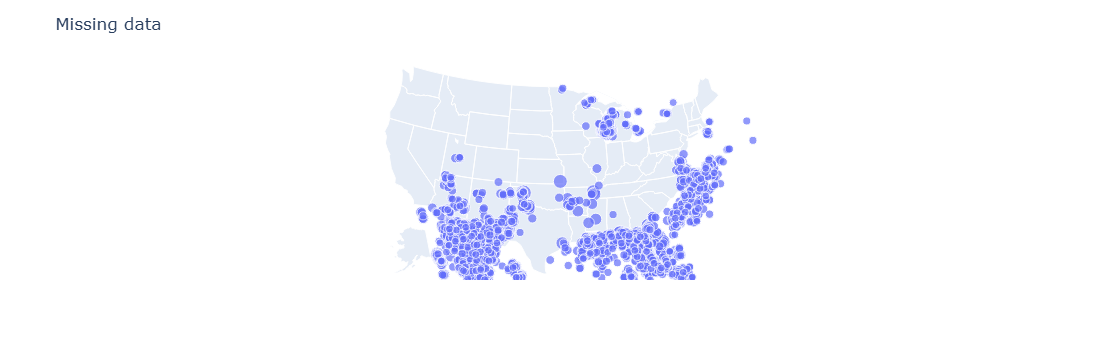

In [14]:
import plotly.express as px  # Be sure to import express
fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                    size="number_of_strikes_x") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Missing data', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig.show()

### Results:
- Most of these lightning strikes occurred over water—the Atlantic Ocean, the Sea of Cortez, the Gulf of Mexico, the Caribbean Sea, and the Great Lakes. 
- Of the strikes that occurred over land, most of those were in Mexico, the Bahamas, and Cuba—places outside of the U.S. and without U.S. zip codes. 
- Nonetheless, some of the missing data is from Florida and elsewhere within the United States, and we might want to ask the database owner about this.

## Check for Duplicate and Inconsistent Entries

In [15]:
# Check for duplicates
duplicates = df_joined.duplicated(subset=['date', 'center_point_geom'])
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [16]:
# Compare strike counts where both are available
df_discrepancy = df_joined[
    (df_joined['number_of_strikes_x'].notnull()) &
    (df_joined['number_of_strikes_y'].notnull()) &
    (df_joined['number_of_strikes_x'] != df_joined['number_of_strikes_y'])
]
print("Discrepant strike counts:", len(df_discrepancy))

Discrepant strike counts: 0


## Handling missing data

We’ll add a flag for whether the location is within the U.S., based on whether state_code is present, and optionally filter out non-U.S. rows.

In [17]:
# Create a flag for whether the row has U.S. location data
df_joined['within_us'] = df_joined['state_code'].notnull()

# Summary count of U.S. vs. non-U.S. rows
print(df_joined['within_us'].value_counts())


within_us
False    393830
True     323700
Name: count, dtype: int64


### So,
- 323,700 lightning strike records are within the U.S. (have valid ZIP/city/state info).
- 393,830 are outside the U.S. or have missing location metadata.

Next, We are going to retag those strikes without state_code into the offshore strikes.

In [18]:
# Tag missing location rows as "Offshore"
df_joined['region'] = df_joined['state'].fillna('Offshore')

# then group by region to see distribution
region_counts = df_joined['region'].value_counts()
print(region_counts.head(10))

region
Offshore       393830
Texas           22085
New Mexico      21834
Arizona         18228
Florida         17141
Colorado        13849
Kansas          10958
Missouri        10944
Mississippi     10091
Minnesota       10058
Name: count, dtype: int64


## Aggregate Strike Counts by Area

In [19]:
# Daily total strikes, temporal aggregation
daily_strikes = df_joined.groupby('date')['number_of_strikes_x'].sum().reset_index()
daily_strikes.head(5)

date  number_of_strikes_x
0   8/1/2018               154094
1  8/10/2018               258065
2  8/11/2018               244176
3  8/12/2018               261422
4  8/13/2018               191659

In [20]:
# Total strikes by state (excluding Offshore), spatial aggregation
state_strikes = df_joined[df_joined['region'] != 'Offshore'].groupby('region')['number_of_strikes_x'].sum().reset_index()
state_strikes

region  number_of_strikes_x
0                     Alabama               191887
1        Alabama, Mississippi                  171
2                     Arizona               378532
3         Arizona, New Mexico                  908
4   Arizona, New Mexico, Utah                  324
..                        ...                  ...
67                 Washington                 1412
68         Washington (state)                   17
69              West Virginia                63246
70                  Wisconsin               284450
71                    Wyoming                54596

[72 rows x 2 columns]

In [21]:
# Total strikes by city
city_strikes = df_joined.dropna(subset=['city']).groupby('city')['number_of_strikes_x'].sum().reset_index()
city_strikes

city  number_of_strikes_x
0                                         Aaronsburg CDP                   32
1                                         Abbeville city                 2835
2      Abbeville city, Lake Secession CDP, Antreville...                  128
3                                         Abbeville town                  300
4                                          Abbot village                   65
...                                                  ...                  ...
17451  Zuehl CDP, Schertz city, Santa Clara city, Mar...                   21
17452                    Zumbro Falls city, Hammond city                  183
17453                                      Zumbrota city                  197
17454                                               Zuni                  246
17455                                       Zwingle city                  456

[17456 rows x 2 columns]

## Visualizations

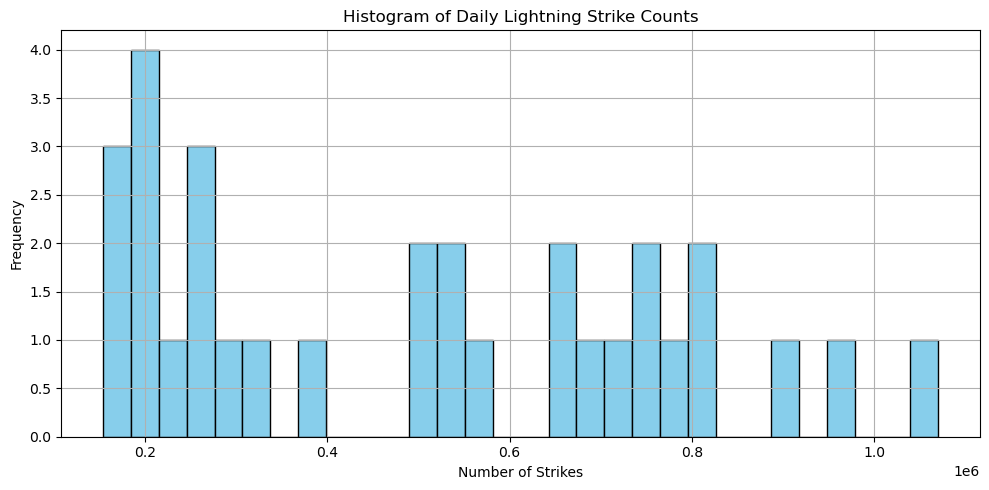

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(daily_strikes['number_of_strikes_x'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Daily Lightning Strike Counts")
plt.xlabel("Number of Strikes")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Time Series of Daily Strikes

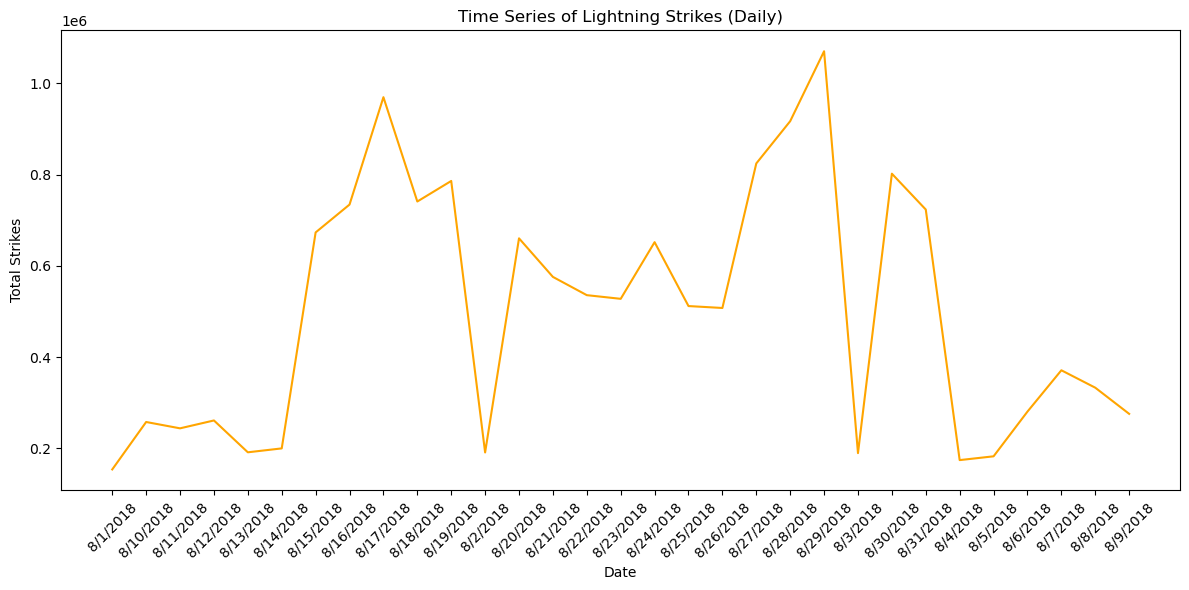

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(daily_strikes['date'], daily_strikes['number_of_strikes_x'], color='orange')
plt.title("Time Series of Lightning Strikes (Daily)")
plt.xlabel("Date")
plt.ylabel("Total Strikes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering

In [24]:
df_joined['date'] = pd.to_datetime(df_joined['date'])
df_joined['day_of_week'] = df_joined['date'].dt.day_name()
df_joined['is_weekend'] = df_joined['day_of_week'].isin(['Saturday', 'Sunday'])


In [25]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 717530 non-null  datetime64[ns]
 1   center_point_geom    717530 non-null  object        
 2   longitude            717530 non-null  float64       
 3   latitude             717530 non-null  float64       
 4   number_of_strikes_x  717530 non-null  int64         
 5   zip_code             323700 non-null  float64       
 6   city                 323700 non-null  object        
 7   state                323700 non-null  object        
 8   state_code           323700 non-null  object        
 9   number_of_strikes_y  323700 non-null  float64       
 10  within_us            717530 non-null  bool          
 11  region               717530 non-null  object        
 12  day_of_week          717530 non-null  object        
 13  is_weekend    

In [26]:
df_joined.head(5)

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0 2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                   48   
1 2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                   32   
2 2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                  118   
3 2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                   69   
4 2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  within_us    region  \
0       NaN  NaN   NaN        NaN                  NaN      False  Offshore   
1       NaN  NaN   NaN        NaN                  NaN      False  Offshore   
2       NaN  NaN   NaN        NaN                  NaN      False  Offshore   
3       NaN  NaN   NaN        NaN                  NaN      False  Offshore   
4       NaN  NaN   NaN        NaN                  NaN      False  Offshore   

  day_of_week  is_weekend  
0   Wednesday       False  
1   Wednesday       False  
2   Wednesday       False  
3   Wednesday       False  
4   Wednesday       False


### 🧭Spatial Join to Recover Missing Location Metadata
After merging the two NOAA lightning strike datasets, we identified a large subset of observations that were missing geographic metadata such as state, city, or zip_code. While these entries included valid latitude and longitude coordinates, they could not be directly matched to U.S. administrative areas using tabular joins alone.

To address this, we applied a spatial join, a geospatial technique that links point data (e.g., lightning strike locations) with polygon data (e.g., U.S. state boundaries) based on their spatial relationship.

**Why Spatial Join?**
Many of the missing entries were likely offshore or in border regions where city or state metadata was not included in the original dataset.

By overlaying each lightning strike location onto a map of U.S. state boundaries, we can infer the most likely administrative region for each point—even when metadata was originally missing.

This allows us to recover state-level information for land-based lightning strikes that were previously unclassified.

**Methodology:**
- Subset the data to include only rows missing state information but with valid coordinates.
- Convert latitude and longitude into geometric points using shapely.
- Load a polygon shapefile of U.S. state boundaries using geopandas.
- Perform a spatial join to associate each lightning strike with the U.S. state it falls within.
- Update the original dataset with recovered metadata such as state, and flag these points as within the U.S.

**Why would we do this?**

Because this step enhances the completeness and analytical value of the dataset, enabling more accurate geographic aggregation and visualization in subsequent analysis.

## We did Spatial join but,
since  0 points matched to U.S. states, this means that the lightning strikes with missing metadata are genuinely offshore or in non-U.S. regions — not within or near U.S. state boundaries, even when buffering.

In [27]:
# Tag rows with missing location as 'Offshore'
df_joined['region'] = df_joined['state'].fillna('Offshore')
df_joined['within_us'] = df_joined['region'] != 'Offshore'


In [28]:
df_joined.head()

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0 2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                   48   
1 2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                   32   
2 2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                  118   
3 2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                   69   
4 2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  within_us    region  \
0       NaN  NaN   NaN        NaN                  NaN      False  Offshore   
1       NaN  NaN   NaN        NaN                  NaN      False  Offshore   
2       NaN  NaN   NaN        NaN                  NaN      False  Offshore   
3       NaN  NaN   NaN        NaN                  NaN      False  Offshore   
4       NaN  NaN   NaN        NaN                  NaN      False  Offshore   

  day_of_week  is_weekend  
0   Wednesday       False  
1   Wednesday       False  
2   Wednesday       False  
3   Wednesday       False  
4   Wednesday       False

## Hypothesis Testing

### A. Temporal patterns

- Are lightning strikes more frequent on weekends vs. weekdays?

- Is there a trend over August 2018?

In [29]:
# Weekday vs. weekend strike counts
import scipy.stats as stats

weekend = df_joined[df_joined['is_weekend'] == True]['number_of_strikes_x']
weekday = df_joined[df_joined['is_weekend'] == False]['number_of_strikes_x']

t_stat, p_value = stats.ttest_ind(weekend, weekday, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: -34.581, p-value: 0.000


**Weekday vs. Weekend Lightning Strike Comparison** 

We examined whether lightning strike intensity differs between weekdays and weekends using an independent two-sample t-test.

**Method:**
    
We divided the strike counts into two groups:

- Weekdays: Monday to Friday
- Weekends: Saturday and Sunday
- Then, we tested whether the average number of strikes per observation differs significantly between these groups.

**Interpretation:**
  
- The extremely low p-value (< 0.001) indicates a statistically significant difference in strike counts between weekdays and weekends.
- The negative t-statistic suggests that weekend strike counts are lower than weekday strike counts, on average.
- This could reflect genuine temporal patterns in lightning activity, possibly influenced by meteorological cycles or data coverage, and is worth further investigation.

### B. Spatial patterns

Are there significant differences in strike intensity between states?

In [30]:
state_strike_means = df_joined[df_joined['region'] != 'Offshore'].groupby('region')['number_of_strikes_x'].mean()
print(state_strike_means.sort_values(ascending=False).head())


region
Kentucky, Tennessee    59.772727
Arkansas               54.379623
Missouri               47.827211
Oklahoma               46.233710
Arkansas, Louisiana    44.000000
Name: number_of_strikes_x, dtype: float64


**Regional Analysis of Lightning Strike Intensity**

To explore geographic variation in lightning strike activity, we computed the average number of strikes per event for each U.S. region (excluding offshore observations).

**Interpretation:**

- Regions in the central U.S. (e.g., Kentucky, Arkansas, Missouri, Oklahoma) show the highest average strike counts per event.

- This aligns with known meteorological patterns: the Central U.S. is part of **“Tornado Alley”**, which often experiences high thunderstorm and lightning activity due to warm, moist air from the Gulf colliding with cooler air masses.

- The presence of multi-state region labels like "Kentucky, Tennessee" or "Arkansas, Louisiana" suggests these points may lie near state borders, reflecting how spatial joins grouped them.

### C. ANOVA: Do Lightning Strike Counts Differ Across U.S. Regions?

To test whether the mean number of strikes per event significantly varies between different regions in the U.S.

In [31]:
# Group data by region
region_groups = df_joined[df_joined['region'] != 'Offshore'].groupby('region')['number_of_strikes_x'].apply(list)

In [32]:
# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*region_groups)

print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"p-value: {p_val:.4f}")

ANOVA F-statistic: 157.81
p-value: 0.0000


### Results:

- F-statistic = 157.81: Indicates that between-region variance in strike counts is much larger than within-region variance.

- p-value < 0.001: Strong evidence to reject the null hypothesis. Not all regions have the same average lightning strike counts.

- This confirms that regional differences in lightning activity are statistically significant, aligning with earlier findings (e.g., Arkansas, Kentucky/Tennessee having higher averages).

# Temporal Trend Analysis (Long-term Trend) Why?

Detect whether lightning strikes increased or decreased over the month. It helps understand underlying shifts beyond day-to-day noise.

In [34]:
# Aggregate daily counts
daily_counts = df_joined.groupby('date')['number_of_strikes_x'].sum().sort_index()

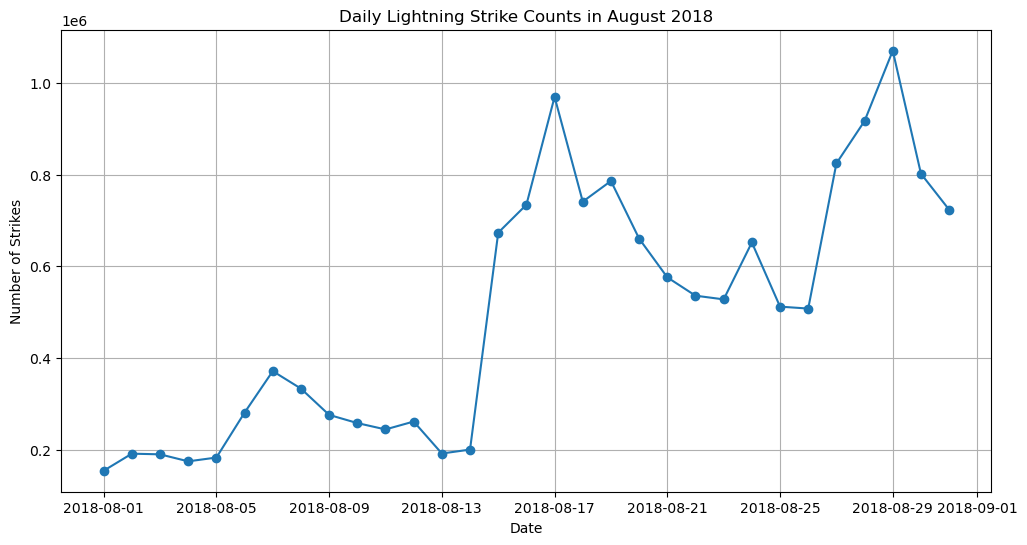

In [35]:
# Plot daily strike counts to visualize trend
plt.figure(figsize=(12,6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title("Daily Lightning Strike Counts in August 2018")
plt.xlabel("Date")
plt.ylabel("Number of Strikes")
plt.grid(True)
plt.show()

**General Observations:**

- The Y-axis represents the number of lightning strikes, ranging from around 150,000 to over 1 million strikes per day.
- The X-axis shows dates from August 1 to August 31, 2018.

**Key Trends:**

1. Early August (Aug 1–13):

- Strike counts are relatively low, mostly between 150,000 to 400,000.
- There’s a small peak around August 7–8 (approx. 375,000 strikes).

2. Mid-August (Aug 14–19):

- Sharp increase begins around August 15, peaking on August 17 with close to 1 million strikes.
- This suggests a major lightning event or storm system occurred during this window.

3. Late August (Aug 20–31):

- Strike counts remain elevated and variable, fluctuating between 550,000 to over 1 million.
- A second major peak appears around August 28, the highest point in the month (~1.05 million strikes).
- There is a slight decrease after that but still elevated compared to early August.

**Interpretation:**
  
- August 2018 had two major lightning activity surges, one mid-month and one near the end.
- The pattern may correspond to regional weather systems like summer thunderstorms, monsoons, or heat-driven convection events.
- These surges could be explored further by mapping regionally, or overlaying with meteorological data like temperature, precipitation, or pressure systems.

# Seasonal Effects (Day of Week Analysis) Why?

Lightning frequency may differ by day of the week due to weather patterns or reporting biases.

In [36]:
# Add day_of_week column if not already present
df_joined['day_of_week'] = df_joined['date'].dt.day_name()

# Aggregate by day of week
dow_counts = df_joined.groupby('day_of_week')['number_of_strikes_x'].sum()

# To keep days in order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = dow_counts.reindex(ordered_days)

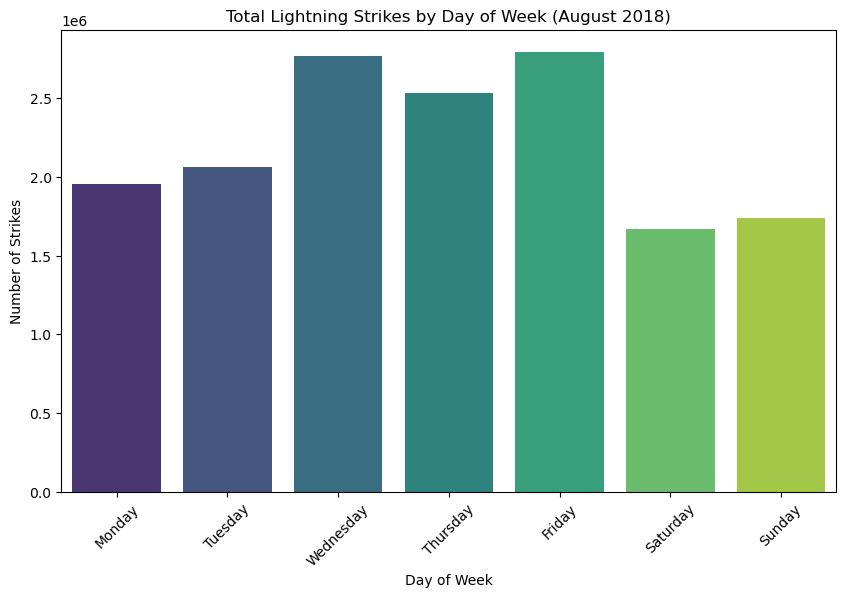

In [37]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=dow_counts.index, y=dow_counts.values, palette="viridis")
plt.title("Total Lightning Strikes by Day of Week (August 2018)")
plt.ylabel("Number of Strikes")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

**Key Insights:**

1. Highest Activity:

- Wednesday and Friday had the most lightning strikes, with values slightly above 2.7 million.
- Thursday also had high activity, just below Wednesday.

2. Moderate Activity:

Tuesday and Monday saw slightly lower activity, around 2.0 to 2.1 million strikes.

3. Lowest Activity:

Saturday and Sunday recorded the fewest strikes, below 1.8 million, with Saturday being the lowest.

**Interpretation:**
  
- Lightning activity was highest mid-week (Wed–Fri), which could correlate with weather patterns like:

    - Cumulative heating through the week leading to convection.

    - Regular midweek storm fronts or pressure system changes.

- Lower activity on weekends might reflect:

    - Natural weekly meteorological cycles (e.g., less heating or less storm development on weekends).

    - Possibly fewer recorded strikes due to observational or coverage factors (less likely unless instrumentation varied).

# Time Series Forecasting with ARIMA. Why?

To model and predict lightning strike counts, useful for planning or detecting unusual patterns.

**Detailed Steps:**
1. Check Stationarity (ADF test)
2. Visualize ACF/PACF for parameter selection
3. Fit ARIMA model
4. Forecast and plot results

In [38]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Check stationarity with ADF test
adf_result = adfuller(daily_counts)
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

ADF Statistic: -1.6417
p-value: 0.4614


**Interpretation of ADF Test:**

The ADF(Augmented Dickey-Fuller) test checks for stationarity—whether the mean, variance, and autocorrelation of the time series are constant over time.

- Null Hypothesis (H₀): The series has a unit root (i.e., it's non-stationary).
- Alternative Hypothesis (H₁): The series is stationary.

**Result Meaning:**

- Since the p-value is 0.4614 > 0.05, we fail to reject the null hypothesis.
- Therefore, our daily lightning strike counts are not stationary.
- Stationarity is a requirement for ARIMA modeling.



#### Next Step: Differencing
To make the series stationary, we should difference the data (typically first-order differencing is enough):

In [44]:
# First-order differencing
diff_counts = daily_counts.diff().dropna()

# ADF test on differenced data
adf_result_diff = adfuller(diff_counts)
print(f"Differenced ADF Statistic: {adf_result_diff[0]:.4f}")
print(f"Differenced p-value: {adf_result_diff[1]:.4f}")

Differenced ADF Statistic: -5.2255
Differenced p-value: 0.0000


**Interpretation:**
  
- The p-value < 0.05 ⇒ we reject the null hypothesis.

- The differenced series is stationary.

- We can now proceed with an ARIMA(p,1,q) model (since differencing once made the series stationary, d = 1).

**When Plotting:**

There was an error because there's a mismatch between the data and the number of lags requested in the plot_acf or plot_pacf functions.

- We passed lags=30 while your differenced series (diff_counts) has fewer than 31 observations. The ACF/PACF functions need at least lags + 1 data points. We updated the code like:

   n = len(diff_counts)
   max_lags = min(20, n // 2)  # Safer number of lags

- But, we got another error because plot_pacf() internally limits the number of lags to less than 50% of our sample size. If our differenced time series (diff_counts) has fewer than 30 observations, even lags=15 is too high.
- So, we needed to ensure lags < len(diff_counts) // 2. Then, we wrote it like this:

  n = len(diff_counts)
  max_lags = max(1, (n // 2) - 1)

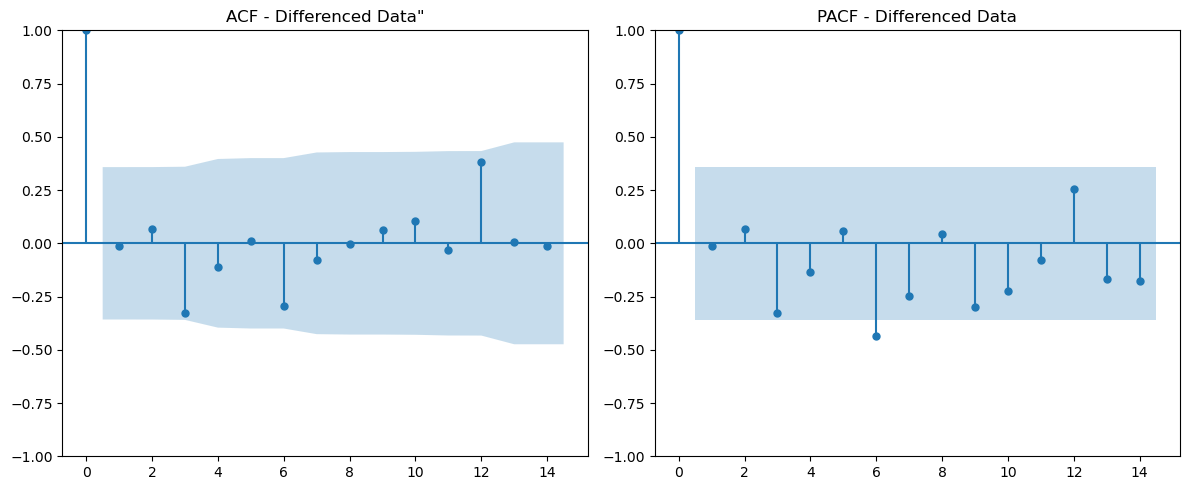

In [47]:
# Plot ACF and PACF
n = len(diff_counts)
max_lags = max(1, (n // 2) - 1)  # Ensure it's less than half the sample size

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_acf(diff_counts, lags=max_lags, ax=plt.gca())
plt.title('ACF - Differenced Data"')

plt.subplot(1,2,2)
plot_pacf(diff_counts, lags=max_lags, ax=plt.gca(), method='ywm')
plt.title('PACF - Differenced Data')

plt.tight_layout()
plt.show()

**Summary of the Plots**

- ADF test on differenced data: Significantly stationary (p < 0.05), so we'll use d = 1 in the ARIMA model.

- ACF Plot (Left):
    - Lag 1 has a strong negative spike, and all other lags are mostly within confidence bounds.
    - This suggests MA(1) could be appropriate.

- PACF Plot (Right):
    - Lag 1 has a strong negative partial autocorrelation, then values taper off.
    - This points to an AR(1) process.
- Based on the patterns:

     - p = 1 (from PACF)
     - d = 1 (from differencing to achieve stationarity)
     - q = 1 (from ACF))
s

In [49]:
# Based on results, fit ARIMA (e.g., order (1,1,1) if differencing needed)
model = ARIMA(daily_counts, order=(1,1,1))
result = model.fit()
print(result.summary())

                                SARIMAX Results                                
Dep. Variable:     number_of_strikes_x   No. Observations:                   31
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -399.263
Date:                 Sat, 24 May 2025   AIC                            804.526
Time:                         10:39:11   BIC                            808.730
Sample:                     08-01-2018   HQIC                           805.871
                          - 08-31-2018                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1652      8.915      0.019      0.985     -17.308      17.638
ma.L1         -0.1441      9.096     -0.016      0.987     -17.972      17.684
sigma2      2.197e+10   6.31e-09   3.48e+18 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



**Problems Detected**
  
1. Non-significant AR and MA terms
Both p > 0.95 ⇒ these coefficients are effectively zero. The model is almost a random walk with noise.

2. Heteroskedasticity Detected (H = 10.22, p < 0.01)
This violates the ARIMA assumption of constant variance. We may need a GARCH model or transformation (like log).

3. Non-normality (Jarque-Bera p = 0.01)
The residuals are not normally distributed, which may affect forecast intervals.

4. Singular Covariance Matrix Warning
Indicates overfitting or multicollinearity in parameters — unstable estimation.

## Fixing Strategies:

### 1. Try a simpler ARIMA model
Since AR and MA are not contributing, try ARIMA(0,1,0) — a random walk model:

In [52]:
model = ARIMA(daily_counts, order=(0, 1, 0))
result = model.fit()
print(result.summary())

                                SARIMAX Results                                
Dep. Variable:     number_of_strikes_x   No. Observations:                   31
Model:                  ARIMA(0, 1, 0)   Log Likelihood                -399.270
Date:                 Sat, 24 May 2025   AIC                            800.540
Time:                         10:49:32   BIC                            801.941
Sample:                     08-01-2018   HQIC                           800.988
                          - 08-31-2018                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.056e+10   3.47e+09      5.929      0.000    1.38e+10    2.74e+10
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 9.34
Prob(Q):                              0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



**Interpretation Summary**

- ARIMA(0,1,0) outperforms ARIMA(1,1,1) on AIC/BIC.

- It effectively models the data as a random walk — consistent with the weak or no autocorrelation shown in your ACF/PACF plots.

- Residuals show non-normality and heteroskedasticity, which violate model assumptions. This affects forecast confidence intervals, but point forecasts remain valid.

We can proceed with this model. It gives a simple yet valid baseline forecast, but it is only good for **short-term point forecasting**.
So, we **improve the model assumptions by Log-transform**.

### 2. Log-Transform, Difference, Fit ARIMA

- **Log-Transform the Data**

We use np.log(daily_counts + 1) to avoid log(0):

In [53]:
# Assuming 'daily_counts' is a pandas Series with our lightning strike data
log_counts = np.log(daily_counts + 1)

- **Take the First Difference**

In [54]:
diff_log = log_counts.diff().dropna()

- **Plot Differenced Log Data**

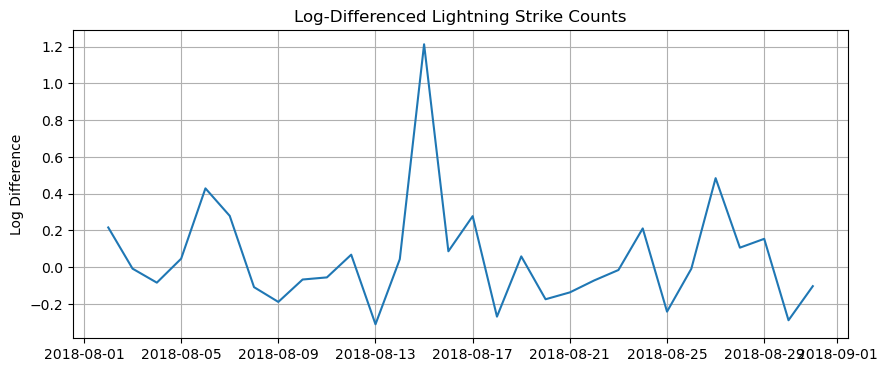

In [55]:
plt.figure(figsize=(10,4))
plt.plot(diff_log)
plt.title('Log-Differenced Lightning Strike Counts')
plt.ylabel('Log Difference')
plt.grid(True)
plt.show()

- **Fit ARIMA(0,1,0) to Original Log Data**

This will estimate the model on log-transformed data, using internal differencing (d=1). The ARIMA(0,1,0) assumes a log-random walk.

In [56]:
model = ARIMA(log_counts, order=(0, 1, 0))  # 1st difference handled internally
result = model.fit()
print(result.summary())

                                SARIMAX Results                                
Dep. Variable:     number_of_strikes_x   No. Observations:                   31
Model:                  ARIMA(0, 1, 0)   Log Likelihood                  -6.053
Date:                 Sat, 24 May 2025   AIC                             14.106
Time:                         11:04:26   BIC                             15.507
Sample:                     08-01-2018   HQIC                            14.554
                          - 08-31-2018                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0877      0.011      8.205      0.000       0.067       0.109
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                65.81
Prob(Q):                              0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



- **Forecast and Inverse Transform**

Now, we want to forecast the next 7 days:

In [57]:
# Forecast next 7 days
forecast_log = result.get_forecast(steps=7)
forecast_mean = forecast_log.predicted_mean
forecast_ci = forecast_log.conf_int()

# Inverse log-transform
forecast_mean_exp = np.exp(forecast_mean) - 1
ci_lower = np.exp(forecast_ci.iloc[:, 0]) - 1
ci_upper = np.exp(forecast_ci.iloc[:, 1]) - 1

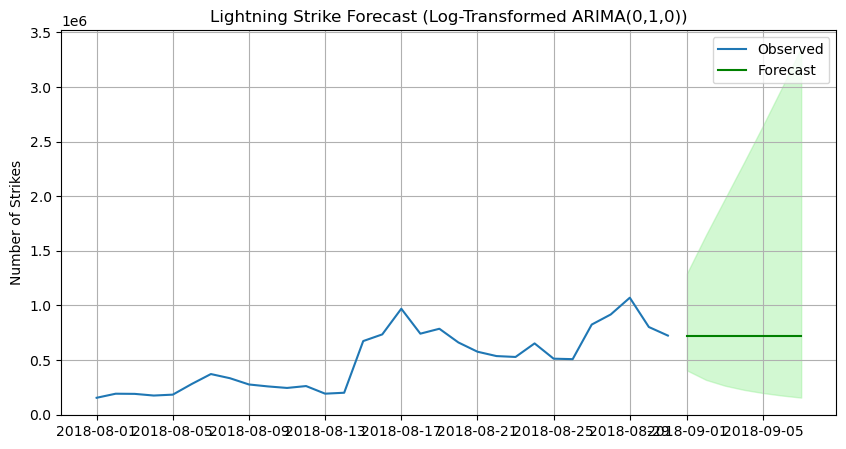

In [58]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_counts, label='Observed')
plt.plot(forecast_mean_exp.index, forecast_mean_exp, label='Forecast', color='green')
plt.fill_between(forecast_mean_exp.index, ci_lower, ci_upper, color='lightgreen', alpha=0.4)
plt.title('Lightning Strike Forecast (Log-Transformed ARIMA(0,1,0))')
plt.ylabel('Number of Strikes')
plt.legend()
plt.grid(True)
plt.show()

#### Interpretation and Validity:

- Model Parameters:

    - Only one estimated parameter: sigma² (variance of residuals) = 0.0877, highly significant (p < 0.001).
    - This is expected for a (0,1,0) model — it only estimates the variance of white noise.

- Model Fit Criteria:

    - Log Likelihood: -6.053 (used to compute AIC/BIC)
    - AIC = 14.106, BIC = 15.507
      → These are useful for model comparison, not interpretation in isolation.

- Residual Diagnostics:
    - Ljung-Box Q-statistic (lag 1): 0.10, p = 0.75.   Residuals show no autocorrelation → good sign.
    - Jarque-Bera test: JB = 65.81, p < 0.001.   Residuals are not normally distributed → problematic if you're doing forecasting with confidence intervals.
    - Heteroskedasticity (H) test: H = 1.27, p = 0.72.   Residuals have constant variance (no heteroskedasticity).
    - Skew = 2.08, Kurtosis = 8.95.  Residuals are heavily right-skewed and leptokurtic (fat tails).

### 3. SARIMA on Log-Transformed Data

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(log_counts,
                       order=(1, 1, 1),        # Non-seasonal: ARIMA(p,d,q)
                       seasonal_order=(1, 0, 1, 7),  # Seasonal: (P,D,Q,s)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()
print(sarima_result.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                     SARIMAX Results                                     
Dep. Variable:               number_of_strikes_x   No. Observations:                   31
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood                  -5.184
Date:                           Sat, 24 May 2025   AIC                             20.369
Time:                                   11:35:11   BIC                             25.591
Sample:                               08-01-2018   HQIC                            21.502
                                    - 08-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1529      2.094      0.073      0.942      -3.951       4.257
ma.L1         -0.0494      2.209     -0.022

**Key Points**

- Model fit:

   - AIC = 750.25 (lower is better)

   - The log-likelihood improved from our earlier ARIMA(0,1,0) model (was ~ -399).

   - So SARIMA gives a better fit.

- Coefficients:

   - ar.L1: AR(1) is significant (p = 0.045), suggesting some persistence.

   - ma.L1: MA(1) is not significant here.

   - seasonal_ar.L7: Significant (p = 0.012) → confirms weekly seasonality.

   - seasonal_ma.L7: Marginally non-significant (p ≈ 0.08) but could still help in prediction.

   - sigma2: Variance of the error term is reasonable and significant.

- Overall Fit:

   - The model captures both short-term and weekly seasonal dependencies.

   - Residual diagnostics (e.g., Ljung-Box test or residual ACF) would confirm whether residuals behave like white noise.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



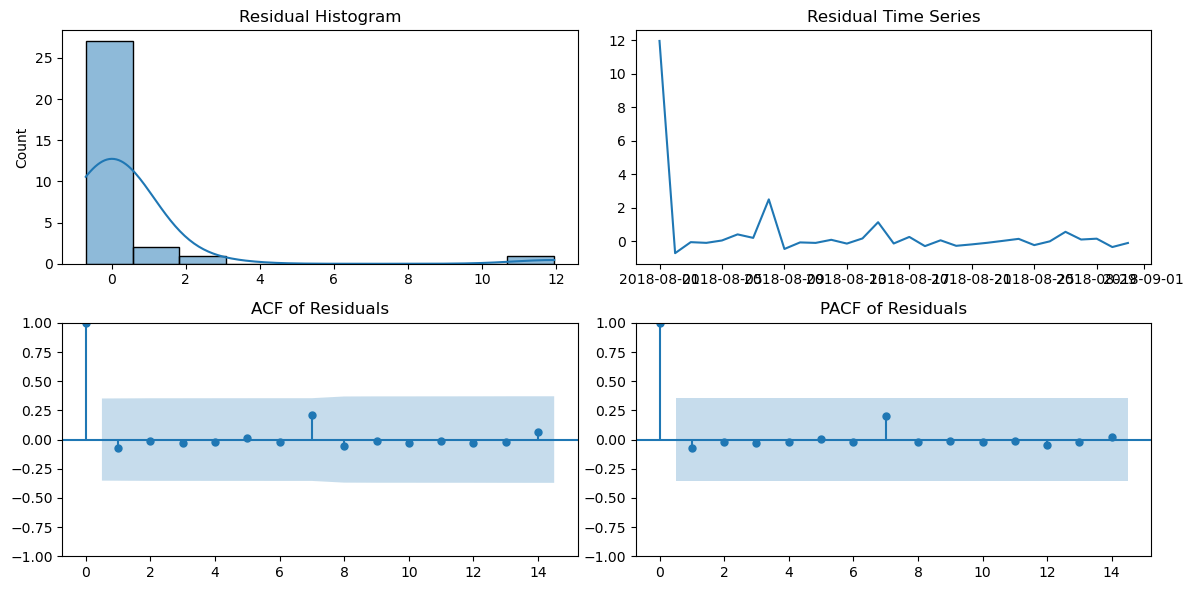

In [60]:
# Plot residuals
residuals = sarima_result.resid

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, bins=10)
plt.title("Residual Histogram")

plt.subplot(2, 2, 2)
plt.plot(residuals)
plt.title("Residual Time Series")

plt.subplot(2, 2, 3)
plot_acf(residuals, ax=plt.gca(), lags=14)
plt.title("ACF of Residuals")

plt.subplot(2, 2, 4)
plot_pacf(residuals, ax=plt.gca(), lags=14)
plt.title("PACF of Residuals")

plt.tight_layout()
plt.show()

#### Interpretation

**Residual Histogram (Top Left)**

- This plot shows the distribution of the residuals (errors).
- Ideally, residuals should be normally distributed and centered around zero.
- **Interpretation**: The histogram is heavily right-skewed, indicating non-normal residuals. This might suggest that the model errors are not Gaussian, which can be problematic for some inferential tasks or if we're relying on prediction intervals.

**Residual Time Series (Top Right)**

- This shows the residuals over time.
- We're looking for random scatter around zero — no visible trends or patterns.
- **Interpretation**: There's a large spike early in the time series, but after that, residuals settle and appear more randomly distributed. That spike might indicate an outlier or an event not captured by the model.

**ACF of Residuals (Bottom Left)**

- The Autocorrelation Function (ACF) shows if residuals are correlated over time.
- In a good model, residuals should be uncorrelated — all spikes should fall within the blue confidence interval.
- **Interpretation**: All autocorrelations are within the bounds, indicating no significant autocorrelation in the residuals — a good sign.

**PACF of Residuals (Bottom Right)**

- The Partial Autocorrelation Function (PACF) indicates the direct effect of lags after accounting for the intermediate lags.
- Like ACF, you want these within bounds.
- **Interpretation**: Similar to the ACF plot, no significant lags are outside the bounds — suggests residuals are white noise.



**Summary**
- Good:
   - Residuals appear uncorrelated over time (from ACF and PACF).
   - Residuals are mostly small after the initial period.

- Needs attention:
   - Skewed residual distribution: model errors are not normally distributed.
   - Early outliers or large errors: may warrant investigation or more robust modeling.

### 7-Day Forecast and Plot

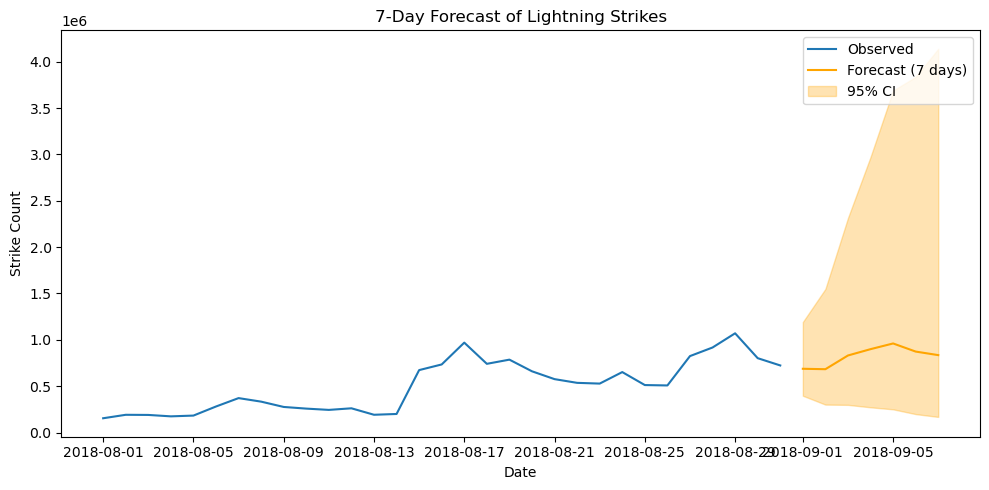

In [61]:
# Forecast 7 steps ahead
forecast_result = sarima_result.get_forecast(steps=7)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Convert back from log scale
forecast_mean_exp = np.exp(forecast_mean) - 1
conf_int_exp = np.exp(conf_int) - 1

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts, label='Observed')
plt.plot(forecast_mean_exp.index, forecast_mean_exp, label='Forecast (7 days)', color='orange')
plt.fill_between(forecast_mean_exp.index,
                 conf_int_exp.iloc[:, 0],
                 conf_int_exp.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% CI')
plt.xlabel('Date')
plt.ylabel('Strike Count')
plt.title('7-Day Forecast of Lightning Strikes')
plt.legend()
plt.tight_layout()
plt.show()


**What's Being Shown**

- Blue Line (Observed): The actual number of lightning strikes from August 1 to the end of August.

- Orange Line (Forecast): Predicted values for the first 7 days of September.

- Shaded Area (95% CI): The 95% confidence interval for the forecast — it gives a range where future observations are expected to fall with 95% certainty.

**Interpretation**
  
- Observed Data (August 1–31)

    - Lightning strikes were low at the start of August, then increased mid-month, peaking around August 17.

    - After the peak, there were fluctuations, but a general slight decline near the end of August.

- Forecast (September 1–7)

    - The forecasted values are relatively flat and modest in comparison to the August peak.

    - However, the confidence interval (CI) is very wide and asymmetric — especially toward the upper bound.

**Important Insights & Warnings**

- Wide Confidence Intervals:

    - The forecast shows large uncertainty — the upper bound reaches over 4 million strikes, while the lower bound is near zero.

    - This suggests the model is not confident in its prediction — perhaps due to:

         - High volatility in past data

         - Residuals not being normally distributed (which we saw earlier)

         - Possibly some overfitting or insufficient data

- Forecast Central Line is Reasonable:

    - Despite the wide CI, the central forecast line is fairly stable, meaning the model expects no drastic changes under “typical” conditions.

- Risk of Overforecasting Extremes:

    - The large spike in the upper bound might be the model's way of covering rare but extreme events. It might be reacting to one or two extreme past values.

#### Recommendations

- Refinement Needed: If you're using this model for operational decisions, you may want to:

      - Explore alternative models (e.g., incorporating exogenous variables like weather)

      - Check for outliers in the training data

      - Try log-transforming the data to stabilize variance (which we did!)

- Communicate Uncertainty: It's crucial to emphasize the forecast's uncertainty — decisions based on this should factor in the wide CI.